In [1]:
import mcnpy
import numpy as np
import matplotlib.pyplot as plt
from mcnpy.cov.parse_covmat import read_scale_covmat
from mcnpy.sampling.sampling import create_perturbed_ace_files

In [2]:
scale_file_path = '../cov/files/scale.rev05.44groupcov.txt'

acefile = '../ace/files/260560_80.02c'

In [3]:
covmat = mcnpy.read_scale_covmat(scale_file_path)

In [4]:
#ace = mcnpy.read_ace(acefile)

In [5]:
# Step 3: Define parameters for perturbation
print("Setting up perturbation...")
# List of MT numbers to perturb (e.g., total, elastic, fission)
mt_numbers = [2, 102, 103, 107]  

# Use a custom energy grid or extract from ACE
# For example, 100 points log-spaced from 1e-11 to 20 MeV
energy_grid = mcnpy.energy_grids.SCALE44

# Number of perturbed samples to generate
num_samples = 2

# Directory to save perturbed files
output_dir = "./perturbed_ace_files"


Setting up perturbation...


In [6]:
# Step 4: Generate perturbed ACE files
print(f"Generating {num_samples} perturbed ACE files...")
create_perturbed_ace_files(
    ace_file_path=acefile,
    mt_numbers=mt_numbers,
    energy_grid=energy_grid,
    covmat=covmat,
    num_samples=num_samples,
    decomposition_method="svd",
    sampling_method="sobol",
    output_dir=output_dir,
    seed=42 
)

print(f"Files saved to: {output_dir}")

Generating 2 perturbed ACE files...
Starting perturbation of 2 ACE files...
Perturbing MT numbers: [2, 102, 103, 107]
Using sobol sampling with svd decomposition
Reading ACE file: ../ace/files/260560_80.02c
ACE file read successfully for initial information extraction
Extracted isotope ID: 26056
Extracting covariance matrix...
Covariance matrix extracted in 0.00 seconds
Generating 2 perturbation factors...
Perturbation factors generated in 0.04 seconds
Using existing output directory: ./perturbed_ace_files
Precomputed mappings in 0.01 seconds
Cleaning up initial ACE object to free memory

Starting ACE file perturbations:
------------------------------------------------------------
Processing sample 1/2... done in 13.19 seconds
Processing sample 2/2... done in 12.45 seconds
------------------------------------------------------------
Perturbation complete!
Total files created: 2/2
Total time: 31.99 seconds
Average time per file: 12.82 seconds
----------------------------------------
Per

In [7]:
pert_acefile = 'perturbed_ace_files/260560_80_0001.02c'
pert_ace = mcnpy.read_ace(pert_acefile)

In [8]:
from mcnpy.ace.analysis import plot_cross_sections

In [9]:
ace = mcnpy.read_ace(acefile)

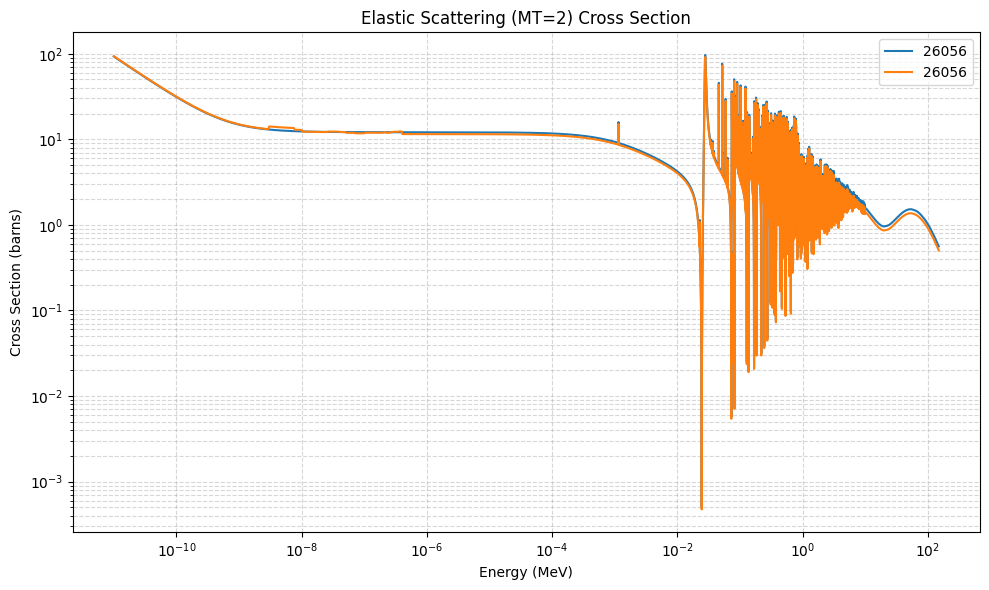

In [11]:
plot_cross_sections([ace, pert_ace], 2);